In [51]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [63]:
class Client():
    def __init__(self):
        print("Client")
    
    def sendClientData(self, X, y, serverXTestData, serverYTestData, model):
        """ Send Client Data X,y,
            Send Server Test Data serverXTestData, serverYTestData, and
            the model to run"""
        self.model = model
        self.X = X
        self.y = y
        self.XTrain, self.XTest, self.yTrain, self.yTest = train_test_split(self.X, self.y, test_size=0.20, random_state=42)
        self.serverXTestData = serverXTestData
        self.serverYTestData = serverYTestData
        
          
    def fitModel(self):
        """Train the Model
            No Params Required"""
        self.model.fit(self.XTrain, self.yTrain)
        
    def getModelWeights(self):
        """returns the Weight Vector"""
        return self.model.coef_
    
    def getModelBias(self):
        """Returns the Bias"""
        return self.model.intercept_
    
    def setServerModelWeights(self, coeff, intercept):
        """Overall Weights and the Bias are set
            Get the weights and bias from the server"""
        self.serverCoef = coeff
        self.ServerIntercept = intercept
        
    def getClientLocalAccuracy(self):
        """Returns Accuracy on Local Test Data
            Accuracy is calculated based on local weights and bais"""
        self.pred = np.zeros(self.XTest.shape[0])
        for i in range(self.XTest.shape[0]):
            val = (self.model.coef_+self.model.intercept_).dot(self.XTest[i])
            if(val>=0):
                self.pred[i] = 1
        return accuracy_score(self.pred, self.yTest)
    
    def getClientGlobalAccuracy(self):
        """Returns Accuracy on Global Test Data
            Accuracy is calculated based on server weights and bias"""
        self.pred = np.zeros(self.serverXTestData.shape[0])
        for i in range(self.serverXTestData.shape[0]):
            val = (self.serverCoef+self.ServerIntercept).dot(self.serverXTestData[i])
            if(val>=0):
                self.pred[i] = 1
        return accuracy_score(self.pred, self.serverYTestData)
    
        

In [75]:
class Server():
    def __init__(self, nClients, timeStamps, model):
        """nClients = number of clients
            timeStamp = number of times the data is transfered between client and server
            model = The model to train"""
        self.nClients = nClients
        self.model = model
        self.pred = np.zeros(n)
        self.cl = []
        for i in range(self.nClients):
            self.cl.append(Client())
        self.timeStamps = timeStamps
    
    def sendDataToServer(self, X, y):
        self.X = X
        self.y = y
        self.fullTSData = np.int16(self.X.shape[0]/self.timeStamps)
    
    def splitData(self):
        self.XTrain, self.XTest, self.yTrain, self.yTest = train_test_split(X, y, test_size=0.20, random_state=42)
#         self.eachClient = np.int16(self.XTrain.shape[0]/self.nClients)
#         self.pred = np.zeros(self.XTest.shape[0])
        
    def divideDataForClients(self):
        self.splitLocations = []
        self.timestampDataSize = np.int16(self.XTrain.shape[0]/self.timeStamps)
        dataPointer = 0
        for i in range(self.timeStamps):
            self.splitLocations.append([dataPointer, dataPointer+self.timestampDataSize])
            dataPointer = dataPointer + self.timestampDataSize
            
    def sendDataAndRunAtClients(self):
        self.eachClientDataSize = int16(self.timestampDataSize/self.nClients)
        j = 0
        for i in range(self.nClients):
            self.cl[i].sendClientData(self.XTrain[j:j+self.eachClientDataSize], self.yTrain[j:j+self.eachClientDataSize], self.model)
            j = j + self.eachClientDataSize
            self.cl[i].fitModel()
               
    def aggregateModel(self):
        self.finalWeights = np.zeros(self.cl[0].getModelWeights().shape)
        self.finalBias = np.zeros(self.cl[0].getModelBias().shape)
        for i in range(self.nClients):
            self.finalWeights += self.cl[i].getModelWeights()
            self.finalBias += self.cl[i].getModelBias()
    
    def serverPredict(self):
        self.pred = np.zeros(self.XTest.shape[0])
        for i in range(self.XTest.shape[0]):
            val = (self.finalWeights+self.finalBias).dot(self.XTest[i])
            if(val>=0):
                self.pred[i] = 1
    
    def serverAccuracy(self):
        return accuracy_score(self.pred, self.yTest)
            

In [69]:
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
model = SVC(C = 1e5, kernel = 'linear')
serv = Server(2, 3, model)
serv.sendDataToServer(X, y)
serv.splitData()
serv.divideDataForClients()

Client
Client


In [73]:
serv.locations

[[0, 266], [266, 532], [532, 798]]

In [ ]:
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
model = SVC(C = 1e5, kernel = 'linear')
serv = Server(2, model)
timeStamps = 4

for i in range(timeStamps):
    print("Timestamp", i)
    eachClientDataSize = np.int16(fullTSData/nc) 
    for k in range(nc):
        print("To client ",k,"indices",cc,"->",cc+eachc)
        cc = cc + eachc
    if(cc%fullTSData != 0):
        deficit = fullTSData - (cc%fullTSData)
    print(deficit)


In [48]:
n = 100000
ts = 6
nc = 3
fullTSData = np.int16(n/ts)
cc = 0
for i in range(ts):
    print("Timestamp", i)
    eachc = np.int16(fullTSData/nc) 
    for k in range(nc):
        print("To client ",k,"indices",cc,"->",cc+eachc)
        cc = cc + eachc
    if(cc%fullTSData != 0):
        deficit = fullTSData - (cc%fullTSData)
    print(deficit)
    

Timestamp 0
To client  0 indices 0 -> 5555
To client  1 indices 5555 -> 11110
To client  2 indices 11110 -> 16665
1
Timestamp 1
To client  0 indices 16665 -> 22220
To client  1 indices 22220 -> 27775
To client  2 indices 27775 -> 33330
2
Timestamp 2
To client  0 indices 33330 -> 38885
To client  1 indices 38885 -> 44440
To client  2 indices 44440 -> 49995
3
Timestamp 3
To client  0 indices 49995 -> 55550
To client  1 indices 55550 -> 61105
To client  2 indices 61105 -> 66660
4
Timestamp 4
To client  0 indices 66660 -> 72215
To client  1 indices 72215 -> 77770
To client  2 indices 77770 -> 83325
5
Timestamp 5
To client  0 indices 83325 -> 88880
To client  1 indices 88880 -> 94435
To client  2 indices 94435 -> 99990
6


In [31]:


serv.sendDataToServer(X,y)
serv.splitData()
serv.sendDataAndRunAtClients()
serv.aggregateModel()
serv.serverPredict()
print(serv.serverAccuracy())

Client
Client
0.965


In [133]:
print(serv.cl[0].getModelWeights().shape, serv.finalWeights.shape)
print(serv.cl[0].getModelWeights(), serv.finalWeights)

(1, 2) (2,)
[[-1.84656389 -1.50004426]] [0. 0.]


In [18]:
model = SVC(C = 1e5, kernel = 'linear')

In [51]:
cl1 = client()
iris = datasets.load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=3)
cl1.get_split_data(X, y, knn)
cl1.fit_model()
cl1.get_accuracy()

Nothing


1.0

In [29]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.20)
clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(x_train, y_train)
# model.dual_coef_.shape
# pred = clf.predict(x_test)
# accuracy_score(pred, y_test)

SVC(C=100000.0, kernel='linear')

In [74]:
print(clf.coef_, clf.intercept_)

[[-1.27665358 -1.19693306]] [-7.36137072]


In [75]:
pred = np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    val = clf.coef_.dot(x_test[i])
    if(val>=0):
        pred[i] = 1

In [76]:
accuracy_score(pred, y_test)

0.922

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [36]:
knn = KNeighborsClassifier(n_neighbors=3) 
fit = knn.fit(X_train, y_train) 

In [43]:
preds = fit.predict(X_test)
accuracy_score(preds, y_test)

1.0

In [12]:
n = 3635
c = 7
arr = np.zeros(c)
each = np.int16(n/c)
print(each)
j = 0
for i in range(c):
    j = j + each
    arr[i] = j
arr[c-1] = n
print(arr)

519
[ 519. 1038. 1557. 2076. 2595. 3114. 3635.]


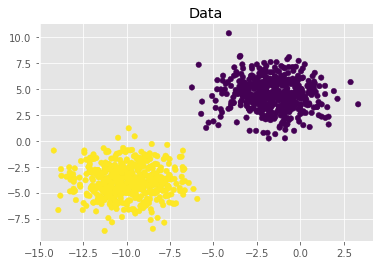

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2-D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

X.shape, y.shape

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)

In [52]:
(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, 
                 cluster_std=2, random_state=1)

In [54]:
y.shape

(5000,)